# Content

#### 1 Importing libraries/dataset
#### 2 Visual Exploration
#### 3 Regression Analysis

## 1 Importing libraries/dataset

In [26]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
#importing dataset
#importing delays dataset
path=r'/Users/Amaikuru/Desktop/Toronto Bus Delays'
#importing data
df=pd.read_pickle(os.path.join(path, '02 Data','Prepared', 'delays_final2.pkl'))

## 2 Visual Exploration

In [28]:
df.columns

Index(['Date', 'Time', 'Day', 'Incident', 'Min Delay', 'Min Gap', 'Fleet',
       'stop_name', 'Route', 'ward_name', 'n_poi', 'n_schools', 'n_worship',
       'dist_to_nearest_station', 'n_stations', 'n_stops', 'n_stops_route',
       'avg_temperature', 'avg_visibility', 'precipitation',
       'stop_delay_count', 'route_delay_count', 'ward_delay_count',
       'day_delay_count', 'year', 'month', 'month_delay_count',
       'Neighbourhood', 'Fatalities', 'Injury_Collisions', 'FTR_Collisions',
       'PD_Collisions', 'neighborhood_collisions', 'day_collisions',
       'neighborhood_delay_count', 'no_stops', 'delay_range', 'dist_range',
       'fleets_on_route', 'ward_population', 'ward_density', 'ward_median_age',
       'ward_low_income', 'ward_median_income', 'child_pop', 'youth_pop',
       'adult_pop', 'senior_pop', 'Ridership'],
      dtype='object')

In [29]:
sub=df[['ward_population', 'ward_median_age', 'ward_median_income','ward_delay_count','ward_density',
         'ward_low_income','child_pop','youth_pop','adult_pop','senior_pop','stop_delay_count', 'route_delay_count'
        ,'neighborhood_delay_count', 'neighborhood_collisions','n_poi', 'n_schools', 'n_worship',
       'dist_to_nearest_station', 'n_stations', 'n_stops', 'n_stops_route']]

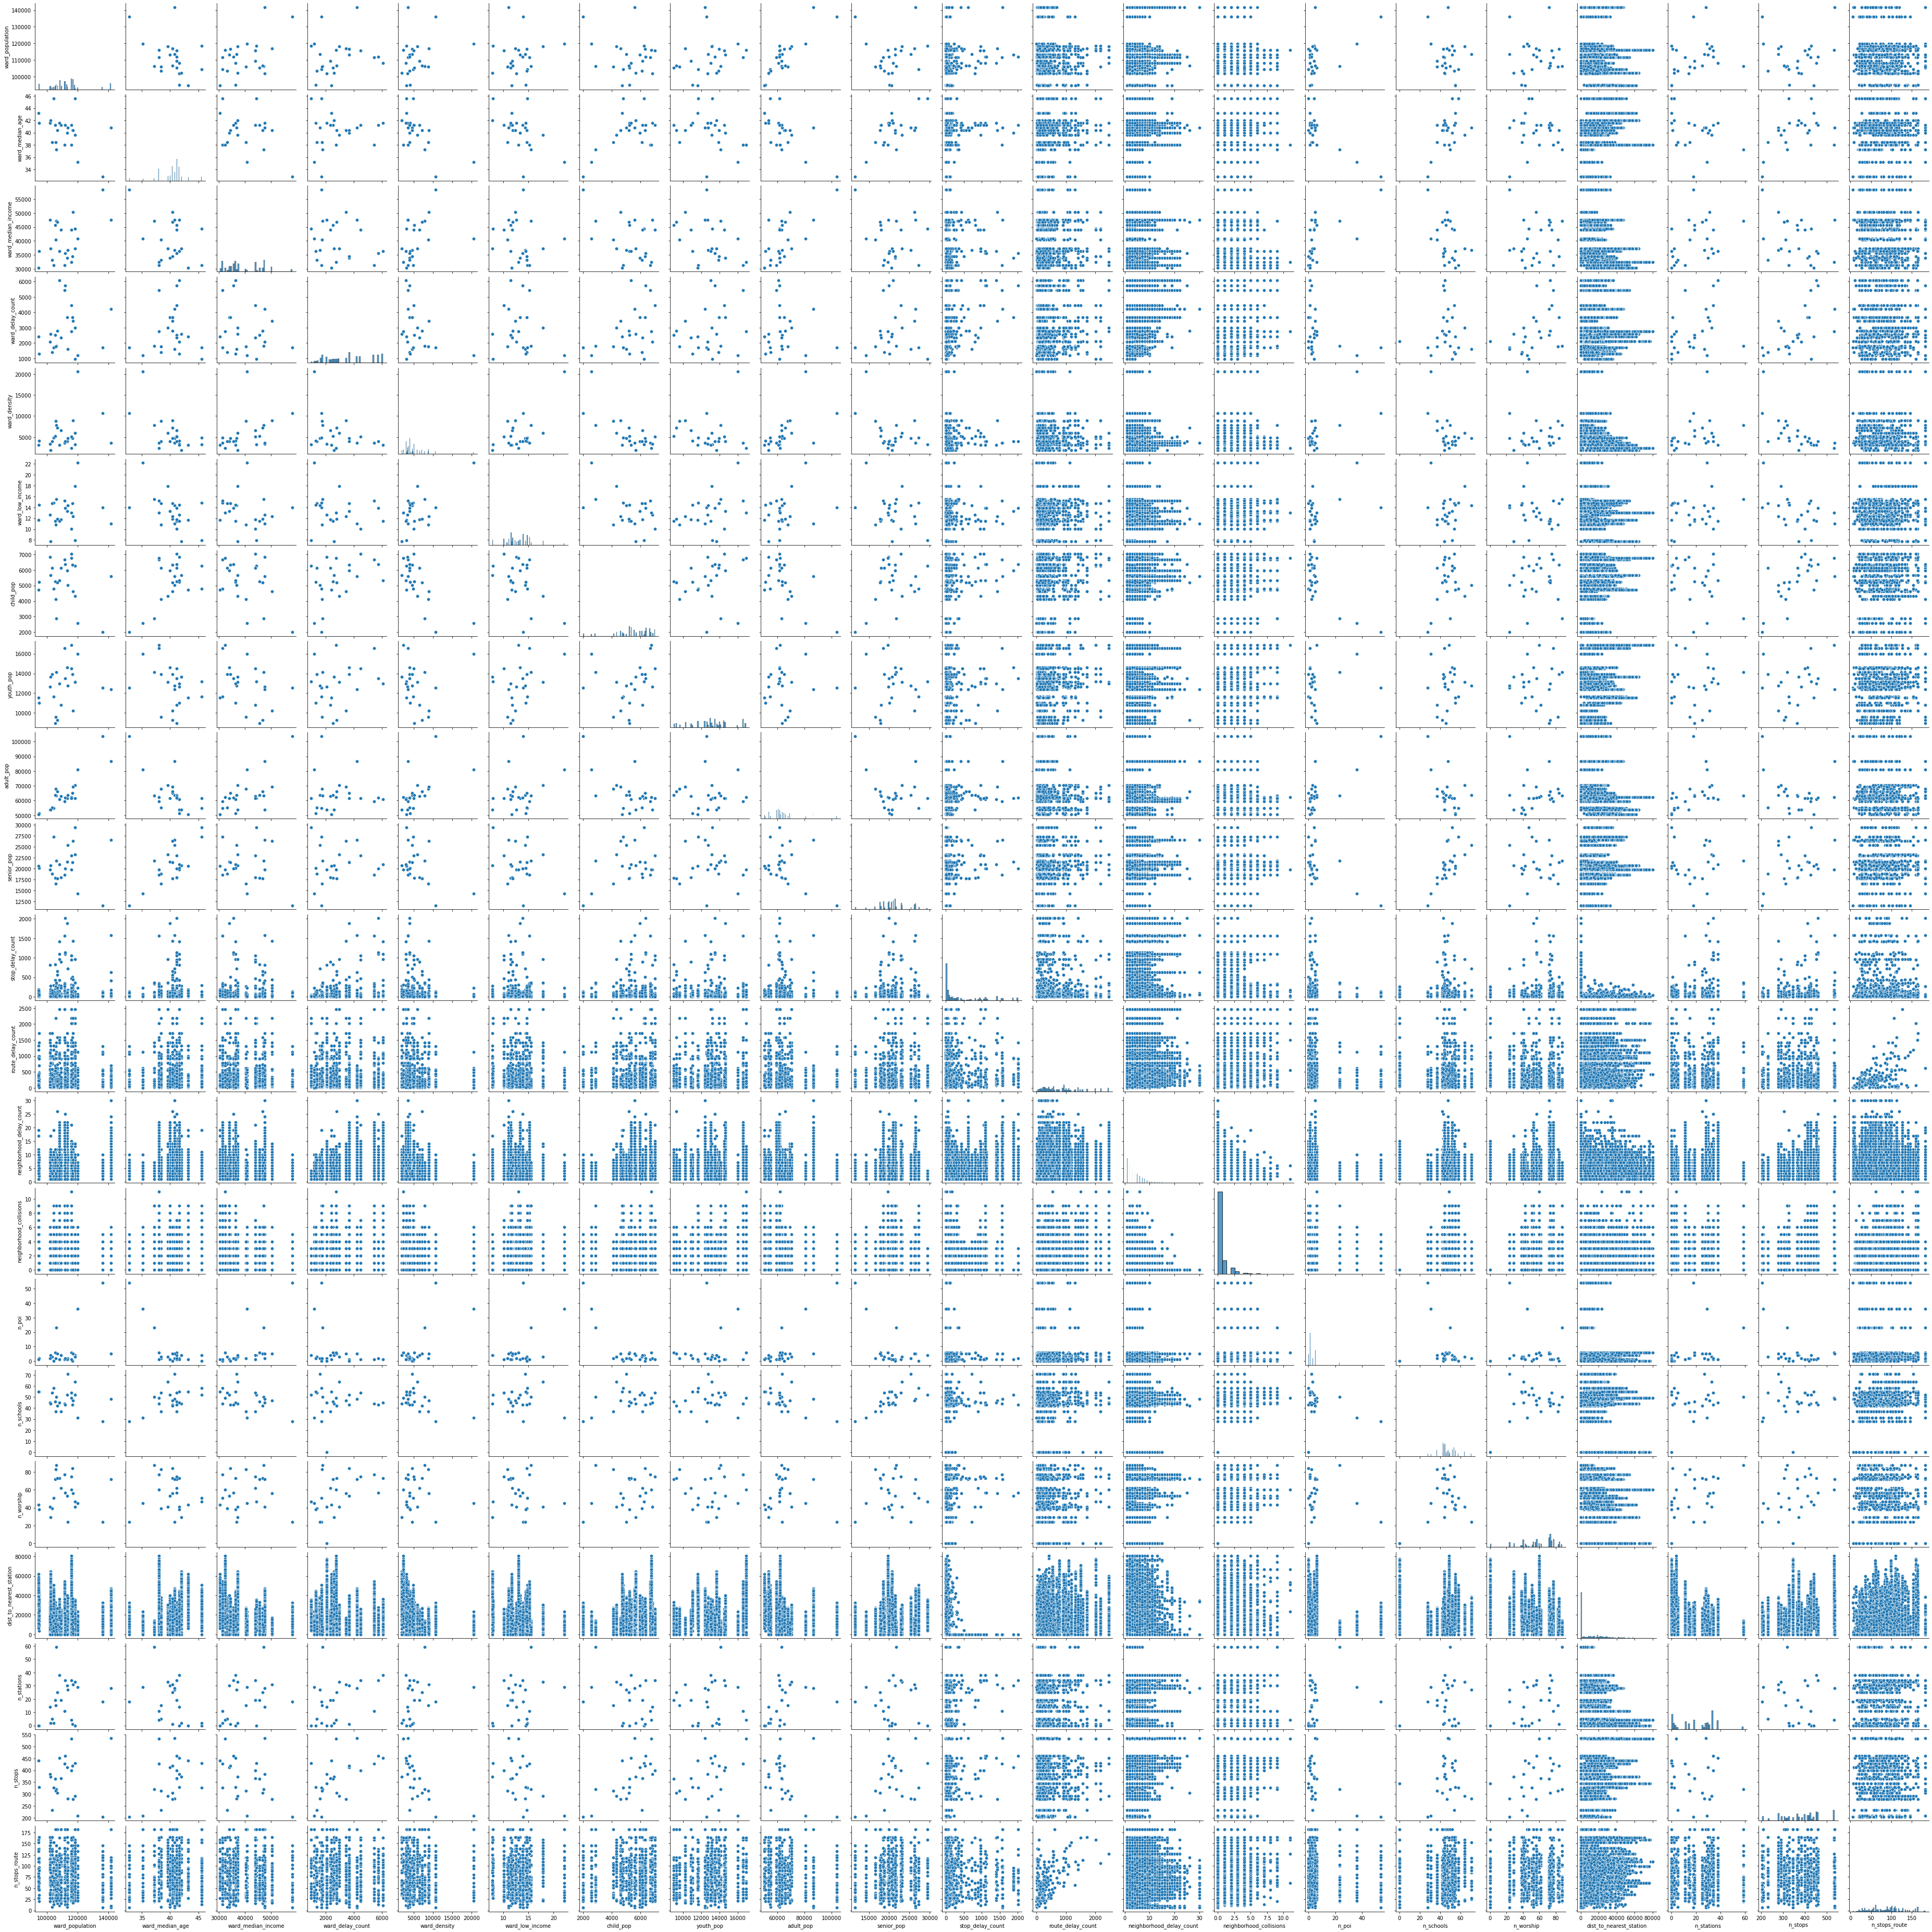

In [5]:
#creating pair plot to look at relationships
pair2=sns.pairplot(sub)
#exporting visual
pair2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pair_plot3.png'))

Text(0.5, 1.0, 'Scatter for relationship between stop delay count and the distance of the stop the nearest station')

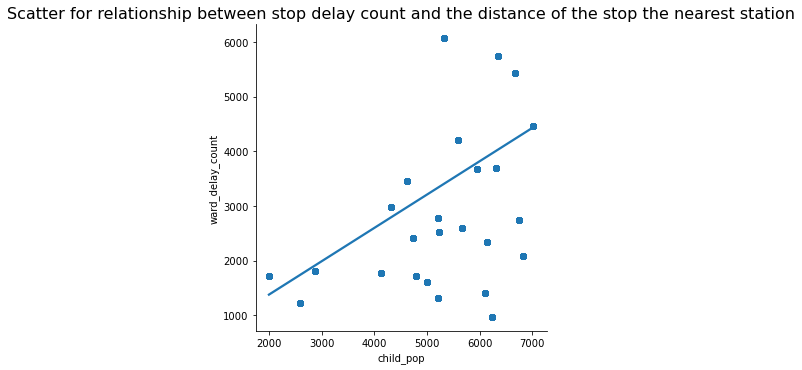

In [47]:
#looking at scatter plot for ward delay count and child population
dist_scat=sns.lmplot(x = 'child_pop', y = 'ward_delay_count', data = df)
plt.title('Scatter for relationship between stop delay count and the distance of the stop the nearest station', fontsize=16)


#### wards with more children experience more delays

## Hypothesis 1

### The more children are in a ward, the more delays occur in that ward


## 3 Regression Analysis

In [31]:
df=df.dropna()

In [48]:
#reshaping to numpy arrays
X=df['child_pop'].values.reshape(-1,1)
y=df['ward_delay_count'].values.reshape(-1,1)

In [49]:
#splitting into training and test set (70-30)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [50]:
#creating regression object
regression = LinearRegression()

In [51]:
#fitting regression to train set
regression.fit(X_train,y_train)

LinearRegression()

In [52]:
#predicting y with X
y_predicted = regression.predict(X_test)

In [53]:
y_predicted

array([[2979.88627854],
       [2791.05328778],
       [3211.35897689],
       ...,
       [2979.88627854],
       [3333.18671287],
       [3793.08641617]])

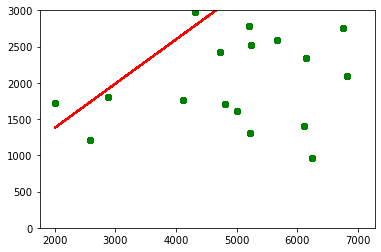

In [54]:
#plotting prediction
plt.scatter(X_test, y_test,color='g')
plt.plot(X_test, y_predicted,color='r')
plt.ylim(0,3000)
plt.show()

#### The line does not fit the data 

In [63]:
#viewing model performance statistics
print('Slope:', regression.coef_)
print('Mean squared error',mean_squared_error(y_test, y_predicted) )
print('R2 score',r2_score(y_test, y_predicted) )

Slope: [[0.60913868]]
Mean squared error 1854144.9354131746
R2 score 0.20808485648012431


#### the model is not too accurate

In [56]:
#creating dataframe with actual and predicted values
data=pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_predicted.flatten()})

In [57]:
data.head(30)

Actual    Predicted
0     3455  2979.886279
1     2981  2791.053288
2     1615  3211.358977
3     1307  3342.323793
4     3688  4009.330648
5     3688  4009.330648
6     5739  4036.741888
7     2339  3902.731379
8     5739  4036.741888
9     5739  4036.741888
10    4471  4441.819110
11    3455  2979.886279
12    5739  4036.741888
13    2339  3902.731379
14    4208  3567.705105
15    2088  4319.991374
16    2339  3902.731379
17    2339  3902.731379
18    3455  2979.886279
19    1720  1380.897244
20    5426  4228.620572
21    2520  3354.506567
22    2520  3354.506567
23    5739  4036.741888
24    3455  2979.886279
25    5426  4228.620572
26    2421  3043.845840
27    2789  3333.186713
28    1615  3211.358977
29    1804  1910.847895

#### predictions are too far off

In [58]:
#performing OLS regression on training set
import statsmodels.api as sm

sm.add_constant(X_train)
mod = sm.OLS(y_train, X_train)
#fitting 
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                          3.044e+05
Date:                Thu, 13 Oct 2022   Prob (F-statistic):                        0.00
Time:                        18:33:46   Log-Likelihood:                     -3.7923e+05
No. Observations:               43890   AIC:                                  7.585e+05
Df Residuals:                   43889   BIC:                                  7.585e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [59]:
#predicting y with X
y_predicted = res.predict(X_test)

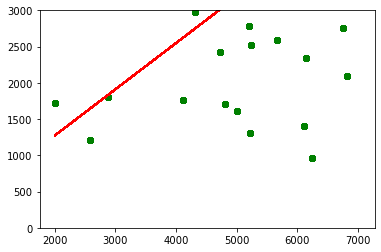

In [60]:
#plotting prediction
plt.scatter(X_test, y_test,color='g')
plt.plot(X_test, y_predicted,color='r')
plt.ylim(0,3000)
plt.show()

In [61]:
#creating dataframe with actual and predicted values
data2=pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_predicted.flatten()})

In [62]:
data2.head(40)

Actual    Predicted
0     3455  2947.465354
1     2981  2749.905514
2     1615  3189.635480
3     1307  3326.652788
4     3688  4024.485126
5     3688  4024.485126
6     5739  4053.163167
7     2339  3912.959410
8     5739  4053.163167
9     5739  4053.163167
10    4471  4476.960889
11    3455  2947.465354
12    5739  4053.163167
13    2339  3912.959410
14    4208  3562.450017
15    2088  4349.502927
16    2339  3912.959410
17    2339  3912.959410
18    3455  2947.465354
19    1720  1274.579612
20    5426  4253.909456
21    2520  3339.398584
22    2520  3339.398584
23    5739  4053.163167
24    3455  2947.465354
25    5426  4253.909456
26    2421  3014.380783
27    2789  3317.093441
28    1615  3189.635480
29    1804  1829.021744
30    2751  4301.706192
31    6068  3396.754667
32    3455  2947.465354
33    2590  3613.433201
34    3673  3798.247245
35    2520  3339.398584
36    2789  3317.093441
37    5426  4253.909456
38    3673  3798.247245
39    5739  4053.163167

#### linear regression is not a suitable prediction method